##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Face Stylizer

This notebook shows you how to use the MediaPipe Tasks Python API to generate stylize faces given a model and input image. This is an experimental feature, so please report any bugs or issues in this sample through the [GitHub sample repo](https://github.com/googlesamples/mediapipe).

## Imports and Setup
Let's start with installing MediaPipe and the related dependencies.

In [1]:
!pip install -q mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 45.5 MB/s eta 0:00:00


## Download the face stylizer model

The next thing you will need to do is download the face stylizer model that will be used for this demo. This model is already trained with a pre-determined style that will be used for face stylization.

In [2]:
#@title Start downloading here.
!wget -O face_stylizer.task -q https://storage.googleapis.com/mediapipe-models/face_stylizer/blaze_face_stylizer/float32/latest/face_stylizer_color_sketch.task

## Download a test image

After downloading the model, you will need to download an image that you can use for testing! It's worth noting that while this is working with a single image, you can download a collection of images to store in the `IMAGE_FILENAMES` array.

In [3]:
import urllib
IMAGE_FILENAMES = ['business-person.png']

for name in IMAGE_FILENAMES:
  url = f'https://storage.googleapis.com/mediapipe-assets/{name}'
  urllib.request.urlretrieve(url, name)

## Preview the downloaded image

You can ensure that everything has downloaded correctly by using the following code to display the downloaded image.

business-person.png


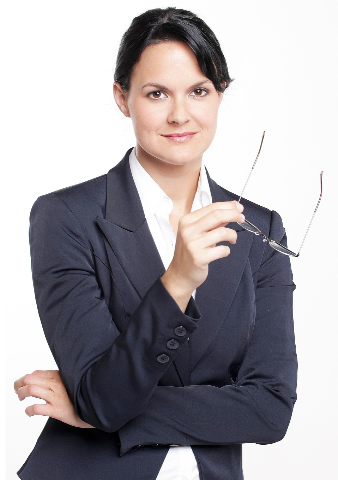

In [4]:
import cv2
from google.colab.patches import cv2_imshow
import math

# Height and width that will be used by the model
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

# Performs resizing and showing the image
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)


# Preview the image(s)
images = {name: cv2.imread(name) for name in IMAGE_FILENAMES}
for name, image in images.items():
  print(name)
  resize_and_show(image)

## Running inference and visualizing the results
To run inference using the face stylizer MediaPipe Task, you will need to initialize the `FaceStylizer` using the model. Once the stylizer has been initialized, you can use the sytlize method to apply the pre-trained model style onto your image.

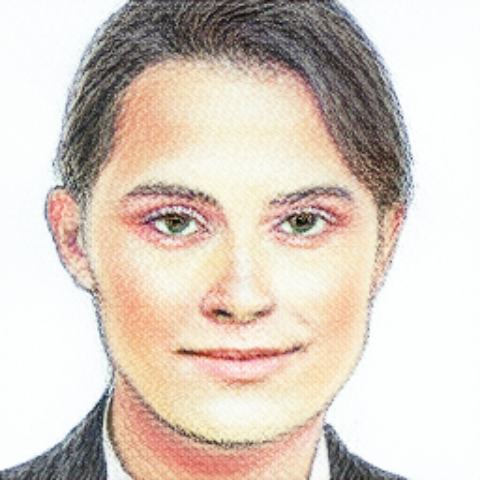

In [5]:
import numpy as np
import mediapipe as mp

from mediapipe.tasks import python
from mediapipe.tasks.python import vision


# Create the options that will be used for FaceStylizer
base_options = python.BaseOptions(model_asset_path='face_stylizer.task')
options = vision.FaceStylizerOptions(base_options=base_options)

# Create the face stylizer
with vision.FaceStylizer.create_from_options(options) as stylizer:

  # Loop through demo image(s)
  for image_file_name in IMAGE_FILENAMES:

    # Create the MediaPipe image file that will be stylized
    image = mp.Image.create_from_file(image_file_name)
    # Retrieve the stylized image
    stylized_image = stylizer.stylize(image)

    # Show the stylized image
    rgb_stylized_image = cv2.cvtColor(stylized_image.numpy_view(), cv2.COLOR_BGR2RGB)
    resize_and_show(rgb_stylized_image)